## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [0]:
'''
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

'\n# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work\ninput_layer = Input(shape=(n,))\nembedding = Embedding(no_1, no_2, input_length=n)(input_layer)\nflatten = Flatten()(embedding)'

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

## Model 2 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

### 1.2 preprocessing of project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### 1.3 preprocessing of project_subject_subcategories


In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

### Removing null values from project essay 3 & 4

In [0]:
# check if we have any nan values are there in the column
print(project_data['project_essay_3'].isnull().values.any())
print("number of nan values",project_data['project_essay_3'].isnull().values.sum())

True
number of nan values 105490


In [0]:
#Replacing the Nan values with most frequent value in the column
project_data['project_essay_3']=project_data['project_essay_3'].fillna(' ')

In [0]:
# check if we have any nan values are there in the column
print(project_data['project_essay_3'].isnull().values.any())
print("number of nan values",project_data['project_essay_3'].isnull().values.sum())

False
number of nan values 0


In [0]:
# check if we have any nan values are there in the column
print(project_data['project_essay_4'].isnull().values.any())
print("number of nan values",project_data['project_essay_4'].isnull().values.sum())

True
number of nan values 105490


In [0]:
#Replacing the Nan values with most frequent value in the column
project_data['project_essay_4']=project_data['project_essay_4'].fillna(' ')

In [0]:
# check if we have any nan values are there in the column
print(project_data['project_essay_4'].isnull().values.any())
print("number of nan values",project_data['project_essay_4'].isnull().values.sum())

False
number of nan values 0


In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[50])
print("="*50)
print(project_data['essay'].values[100])
print("="*50)
print(project_data['essay'].values[200])
print("="*50)
print(project_data['essay'].values[999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

As an inclusion kindergarten teacher, I am constantly looking for materials to help students develop and grow throughout the school year.  This has been challenging with the school is limited funding for supplies. \r\n\r\nWe are a classroom of 20 friendly and curious learners, from various ethnic backgrounds, facing challenges, including poverty and developmental delays.\r\n\r\nMy students are future scholars, teachers, doctors, and accomplished human beings.  I need the public is help to raise money for materials that help maintain the attention of my special needs students.Last year was my first year teaching Kindergarten inclusion.  I learned that students can wiggle, and learn at the same time!\r\n\r\nMy students need sensory toys to maintain focus on simple tasks that will shape their social and academic future.  My students with ADHD find themselves moving their hands, feet, and bodies without much control.  Sensory toys help my students use their energy in a positive manner (fid

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As an inclusion kindergarten teacher, I am constantly looking for materials to help students develop and grow throughout the school year.  This has been challenging with the school is limited funding for supplies.     We are a classroom of 20 friendly and curious learners, from various ethnic backgrounds, facing challenges, including poverty and developmental delays.    My students are future scholars, teachers, doctors, and accomplished human beings.  I need the public is help to raise money for materials that help maintain the attention of my special needs students.Last year was my first year teaching Kindergarten inclusion.  I learned that students can wiggle, and learn at the same time!    My students need sensory toys to maintain focus on simple tasks that will shape their social and academic future.  My students with ADHD find themselves moving their hands, feet, and bodies without much control.  Sensory toys help my students use their energy in a positive manner (fidget toys, bo

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As an inclusion kindergarten teacher I am constantly looking for materials to help students develop and grow throughout the school year This has been challenging with the school is limited funding for supplies We are a classroom of 20 friendly and curious learners from various ethnic backgrounds facing challenges including poverty and developmental delays My students are future scholars teachers doctors and accomplished human beings I need the public is help to raise money for materials that help maintain the attention of my special needs students Last year was my first year teaching Kindergarten inclusion I learned that students can wiggle and learn at the same time My students need sensory toys to maintain focus on simple tasks that will shape their social and academic future My students with ADHD find themselves moving their hands feet and bodies without much control Sensory toys help my students use their energy in a positive manner fidget toys bouncy chairs etc With fidget toys my

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:57<00:00, 1907.88it/s]


In [0]:
# after preprocesing
preprocessed_essays[200]

'as inclusion kindergarten teacher i constantly looking materials help students develop grow throughout school year this challenging school limited funding supplies we classroom 20 friendly curious learners various ethnic backgrounds facing challenges including poverty developmental delays my students future scholars teachers doctors accomplished human beings i need public help raise money materials help maintain attention special needs students last year first year teaching kindergarten inclusion i learned students wiggle learn time my students need sensory toys maintain focus simple tasks shape social academic future my students adhd find moving hands feet bodies without much control sensory toys help students use energy positive manner fidget toys bouncy chairs etc with fidget toys students use energy play appropriately listening time i noticed students special needs able pay attention given proper tools models succeed my goal accommodate young learners special needs allow express p

In [0]:
project_data['preprocessed_essays'] = preprocessed_essays

## 1.4 Preprocessing of `project_title`

In [0]:
# similarly you can preprocess the titles also
project_data.head(2)

Unnamed: 0  ...                                preprocessed_essays
0      160221  ...  my students english learners working english s...
1      140945  ...  our students arrive school eager learn they po...

[2 rows x 19 columns]

In [0]:
# printing some random project titles.
print(project_data['project_title'].values[54])
print("="*50)
print(project_data['project_title'].values[89])
print("="*50)
print(project_data['project_title'].values[99])
print("="*50)
print(project_data['project_title'].values[156])
print("="*50)
print(project_data['project_title'].values[846])
print("="*50)

Swim For Life At YMCA!
Education Through Technology
Teaching Math With Manipulatives
Getting Our MOVE On!
21st Century Skills and Technology Optimized to Improve OUR World!!!


In [0]:
#Removing phrases from the title features
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"Gotta", "Got to", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
#Checkingt titles after removing phrases
sent = decontracted(project_data['project_title'].values[836])
print(sent)
print("="*50)

Digital Magazine


In [0]:
# Remove \\r \\n \\t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Digital Magazine


In [0]:
#Removing numbers & symbols form the titles
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Digital Magazine


In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
#Combining all the above preprocessed statements
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 39088.13it/s]


In [0]:
#checking cleaned text after preprocesing
print(preprocessed_titles[54])
print("="*50)
print(preprocessed_titles[89])
print("="*50)
print(preprocessed_titles[99])
print("="*50)
print(preprocessed_titles[156])
print("="*50)
print(preprocessed_titles[836])

swim for life at ymca
education through technology
teaching math with manipulatives
getting our move on
digital magazine


In [0]:
project_data['preprocessed_titles'] = preprocessed_titles

In [0]:
project_data['all_text'] = project_data['preprocessed_essays'] + ' ' + project_data['preprocessed_titles']

In [0]:
all_text = project_data["all_text"]
all_text

0         my students english learners working english s...
1         our students arrive school eager learn they po...
2         true champions not always ones win guts by mia...
3         i work unique school filled esl english second...
4         our second grade classroom next year made arou...
                                ...                        
109243    welcome mr ramos 2nd grade classroom we title ...
109244    every morning start day core values lead solel...
109245    this great group sharing caring students it mu...
109246    our students live small rural community our cl...
109247    when last time used math probably within last ...
Name: all_text, Length: 109248, dtype: object

In [0]:
# check if we have any nan values are there in the column
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


In [0]:
#Replacing the Nan values with most frequent value in the column
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [0]:
# check if we have any nan values are there in the column
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

False
number of nan values 0


In [0]:
#Converting teacher prefix text into smaller case
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs.       57272
ms.        38955
mr.        10648
teacher     2360
dr.           13
Name: teacher_prefix, dtype: int64

### Splitting data into Train and cross validation(or test): Stratified Sampling


In [0]:
X = project_data

In [0]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0  ...                                           all_text
0      160221  ...  my students english learners working english s...

[1 rows x 20 columns]

In [0]:
#Splitting data into test & train set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,stratify=y)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import regularizers
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Input
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.text import Tokenizer 
from numpy import zeros

Using TensorFlow backend.


In [0]:
# code source - https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
train_essay_tfidf = vectorizer.fit_transform(X_train['all_text'])
test_essay_tfidf = vectorizer.transform(X_test['all_text'])
print("Shape of matrix after performing tfidf encoding ",train_essay_tfidf.shape)
print("Shape of matrix after performing tfidf encodig ",test_essay_tfidf.shape)

Shape of matrix after performing tfidf encoding  (73196, 14548)
Shape of matrix after performing tfidf encodig  (36052, 14548)


In [0]:
idf = vectorizer.idf_
idf_dict = dict(zip(vectorizer.get_feature_names(), idf))

In [0]:
# code source - https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
import operator
sorted_idf_dict = sorted(idf_dict.items(), key=operator.itemgetter(1))
print(sorted_idf_dict)

[('students', 1.0074735176336604), ('school', 1.1598135452920744), ('my', 1.2435457681401483), ('learning', 1.3473872251285508), ('classroom', 1.3843164980374858), ('not', 1.4445186152731146), ('the', 1.4506101348627711), ('learn', 1.4549071507560978), ('help', 1.4946809407796235), ('they', 1.4997122849213929), ('many', 1.5747889983505372), ('need', 1.6418210984808912), ('we', 1.6834534802840073), ('work', 1.7194052896605525), ('come', 1.7323924851873636), ('use', 1.778449814065107), ('able', 1.8266375887380595), ('love', 1.8382899136097661), ('our', 1.852864555052606), ('also', 1.8630457113642822), ('day', 1.8643743137729745), ('this', 1.8685661020681268), ('class', 1.870880729256786), ('make', 1.9320848459494817), ('new', 1.994063611130078), ('year', 2.0101401705364257), ('one', 2.013559876617951), ('these', 2.0224834432249534), ('student', 2.0342121024395734), ('time', 2.03436583034149), ('would', 2.0367516397619356), ('want', 2.0620733992142943), ('skills', 2.0772831206729556), ('g

In [0]:
# code source -  https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
idf_df = pd.DataFrame(list(idf_dict.items()), columns=['word', 'idf_value'])

In [0]:
sorted_idf_df = idf_df.sort_values(by = 'idf_value')

Text(0.5, 1.0, 'violin plot for IDF values of essay text')

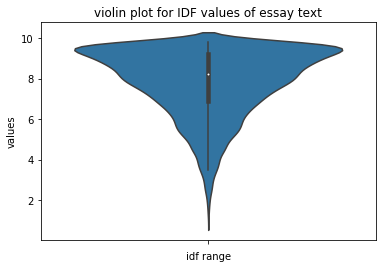

In [0]:
import seaborn as sns
sns.violinplot(data=sorted_idf_df, x='idf_value', orient='v')
plt.xlabel('idf range')
plt.ylabel('values')
plt.title('violin plot for IDF values of essay text')

Text(0.5, 1.0, 'Box plot for IDF values of essay text')

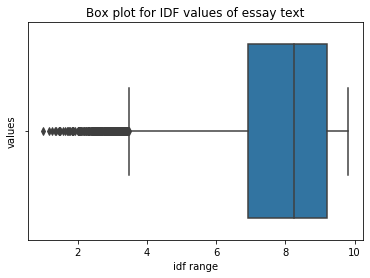

In [0]:
import seaborn as sns
sns.boxplot(data=sorted_idf_df, x='idf_value')
plt.xlabel('idf range')
plt.ylabel('values')
plt.title('Box plot for IDF values of essay text')

In [0]:
txt_data = []
for _ in sorted_idf_dict:
  if (_[1]>2 and _[1]<=10):
    txt_data.append(_[0])

In [0]:
len(txt_data)

14523

In [0]:
mod_essay=[] 
for i in tqdm(X_train['all_text'].values):
      sentence=[word for word in i.split() if word in txt_data]    
      mod=' '.join(sentence)
      mod_essay.append(mod)

100%|██████████| 73196/73196 [13:06<00:00, 93.06it/s]


In [0]:
len(mod_essay)

73196

In [0]:
mod_essay=np.array(mod_essay)
corp=[]
len_essay=[]
for sent in mod_essay:
  count=0
  for word in sent.split():
    corp.append(word)
    count=count+1
  len_essay.append(count)
max_len=max(len_essay)
print("Maximum length of essay =",max_len)
corp=set(corp)
vocab_size=len(corp)
print("Number of unique words ",vocab_size)

Maximum length of essay = 293
Number of unique words  14523


In [0]:
token = Tokenizer()
token.fit_on_texts(mod_essay)
vocab_size = len(token.word_index) + 1
# integer encode the documents
encoded_train = token.texts_to_sequences(X_train["essay"])
encoded_test = token.texts_to_sequences(X_test["essay"])

In [0]:
# pad documents to a max length of 1000 words
max_length = max_len
padded_train = pad_sequences(encoded_train, maxlen=max_length)
padded_test = pad_sequences(encoded_test, maxlen=max_length)
padded_essay_train = padded_train
padded_essay_test = padded_test 

In [0]:
f = open("/content/drive/My Drive/glove_vectors","rb")
glove = pickle.load(f)

In [0]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in token.word_index.items():
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
emb_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)
input_lyr = Input(shape=(max_len,))
emb = emb_layer(input_lyr)
x = LSTM(128,return_sequences=True)(emb)
flat_1 = Flatten()(x)

## Embedding Categorical Data 

In [0]:
# code source - https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

### For School State

In [0]:
vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['school_state'].values)
enc_school_state_train = vectorizer.transform(X_train['school_state'].values)
enc_school_state_test = vectorizer.transform(X_test['school_state'].values)

In [0]:
unique_states = X_train['school_state'].nunique()
print(unique_states)

51


In [0]:
input_state = Input(shape=(1,),name="school_state")
state_emb_size = int(min(np.ceil((unique_states)/2), 50))
embedded_state = Embedding(unique_states, state_emb_size, trainable=True)(input_state)
flatten_state = Flatten()(embedded_state)

### Embedding Teacher Prefix

In [0]:
vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['teacher_prefix'].values)
enc_teacher_prefix_train = vectorizer.transform(X_train['teacher_prefix'].values)
enc_teacher_prefix_test = vectorizer.transform(X_test['teacher_prefix'].values)

In [0]:
unique_tp = X_train['teacher_prefix'].nunique()
print(unique_tp)

5


In [0]:
input_tp = Input(shape=(1,),name="teacher_prefix")
tp_emb_size = int(min(np.ceil((unique_tp)/2), 50))
embedded_tp = Embedding(unique_tp, tp_emb_size, trainable=True)(input_tp)
flatten_tp = Flatten()(embedded_tp)

### Embedding Subject Category

In [0]:
vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['clean_categories'])
enc_cat_train = vectorizer.transform(X_train['clean_categories'])
enc_cat_test = vectorizer.transform(X_test['clean_categories'])

In [0]:
unique_cat = X_train['clean_categories'].nunique()
print(unique_cat)

51


In [0]:
input_cc = Input(shape=(1,),name="clean_categories")
cat_emb_size = int(min(np.ceil((unique_cat)/2), 50))
embedded_cat = Embedding(unique_cat, cat_emb_size, trainable=True)(input_cc)
flatten_cat = Flatten()(embedded_cat)

### Embedding Subject Sub-Category

In [0]:
vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['clean_subcategories'])
enc_subcat_train = vectorizer.transform(X_train['clean_subcategories'])
enc_subcat_test = vectorizer.transform(X_test['clean_subcategories'])

In [0]:
unique_subcat = X_train['clean_subcategories'].nunique()
print(unique_subcat)

392


In [0]:
input_subcat = Input(shape=(1,),name="clean_subcategories")
subcat_emb_size = int(min(np.ceil((unique_subcat)/2), 50))
embedded_subcat = Embedding(unique_subcat, subcat_emb_size, trainable=True)(input_subcat)
flatten_subcat = Flatten()(embedded_subcat)

### Embedding Project Grade Category

In [0]:
vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['project_grade_category'])
enc_grade_train = vectorizer.transform(X_train['project_grade_category'])
enc_grade_test = vectorizer.transform(X_test['project_grade_category'])

In [0]:
unique_grade = X_train['project_grade_category'].nunique()
print(unique_grade)

4


In [0]:
input_grade = Input(shape=(1,),name="project_grade_category")
grade_emb_size = int(min(np.ceil((unique_grade)/2), 50))
embedded_grade = Embedding(grade_emb_size, unique_grade, trainable=True)(input_grade)
flatten_grade = Flatten()(embedded_grade)

### Vectorizing Numerical Features

#### For Price Feature

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# join two dataframes in python:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [0]:
from sklearn.preprocessing import Normalizer
price_normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
price_normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = price_normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = price_normalizer.transform(X_test['price'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [0]:
X_train_price_norm = X_train_price_norm.T
X_test_price_norm = X_test_price_norm.T
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

(73196, 1) (73196,)
(36052, 1) (36052,)


#### For Quantity Feature 

In [0]:
#Normalizing quantity
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(1,-1))
X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [0]:
X_train_quantity_norm = X_train_quantity_norm.T
X_test_quantity_norm = X_test_quantity_norm.T
print("Final Matrix")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

Final Matrix
(73196, 1) (73196,)
(36052, 1) (36052,)


#### For Teacher Previously Posted Project Feature

In [0]:
# Normalizing teacher previously posted projects
#Normalizing quantity
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_tpp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_tpp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print("After vectorizations")
print(X_train_tpp_norm.shape, y_train.shape)
print(X_test_tpp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 73196) (73196,)
(1, 36052) (36052,)


In [0]:
X_train_tpp_norm = X_train_tpp_norm.T
X_test_tpp_norm = X_test_tpp_norm.T
print(X_train_tpp_norm.shape, y_train.shape)
print(X_test_tpp_norm.shape, y_test.shape)
print("="*100)

(73196, 1) (73196,)
(36052, 1) (36052,)


In [0]:
numerical_fts_train = np.hstack((X_train_price_norm, X_train_quantity_norm, X_train_tpp_norm))
numerical_fts_test = np.hstack((X_test_price_norm, X_test_quantity_norm, X_test_tpp_norm))

In [0]:
from keras.regularizers import l2
numerical_input = Input(shape=(3,),name="numerical_fts")
num_input = Dense(100, activation='relu', kernel_initializer="he_normal", kernel_regularizer="l2")(numerical_input)

In [0]:
from keras.layers import concatenate
concatenated_fts = concatenate([flat_1, flatten_state, flatten_tp, flatten_cat, flatten_subcat, flatten_grade, num_input])

In [0]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras import regularizers
from keras.initializers import he_normal
from keras.regularizers import l2
from keras.layers import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation
from keras.layers import Dropout

x_concat = concatenated_fts

z = Dense(256, activation="relu", kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001))(x_concat)
z = (Dropout(0.3))(z)

z = Dense(128, activation="relu", kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001))(z)
z = (Dropout(0.3))(z)

z = Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001))(z)
z = (Dropout(0.3))(z)
z = BatchNormalization()(z)

z = Dense(32, activation="relu", kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.001))(z)
z = (Dropout(0.3))(z)
z = BatchNormalization()(z)

output = Dense(2, activation = "softmax", name="output")(z)
model_two = Model(inputs=[input_lyr, input_state, input_tp, input_cc, input_subcat, input_grade, numerical_input],outputs=[output])
model_two.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 293)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 293, 300)     4357200     input_1[0][0]                    
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                     

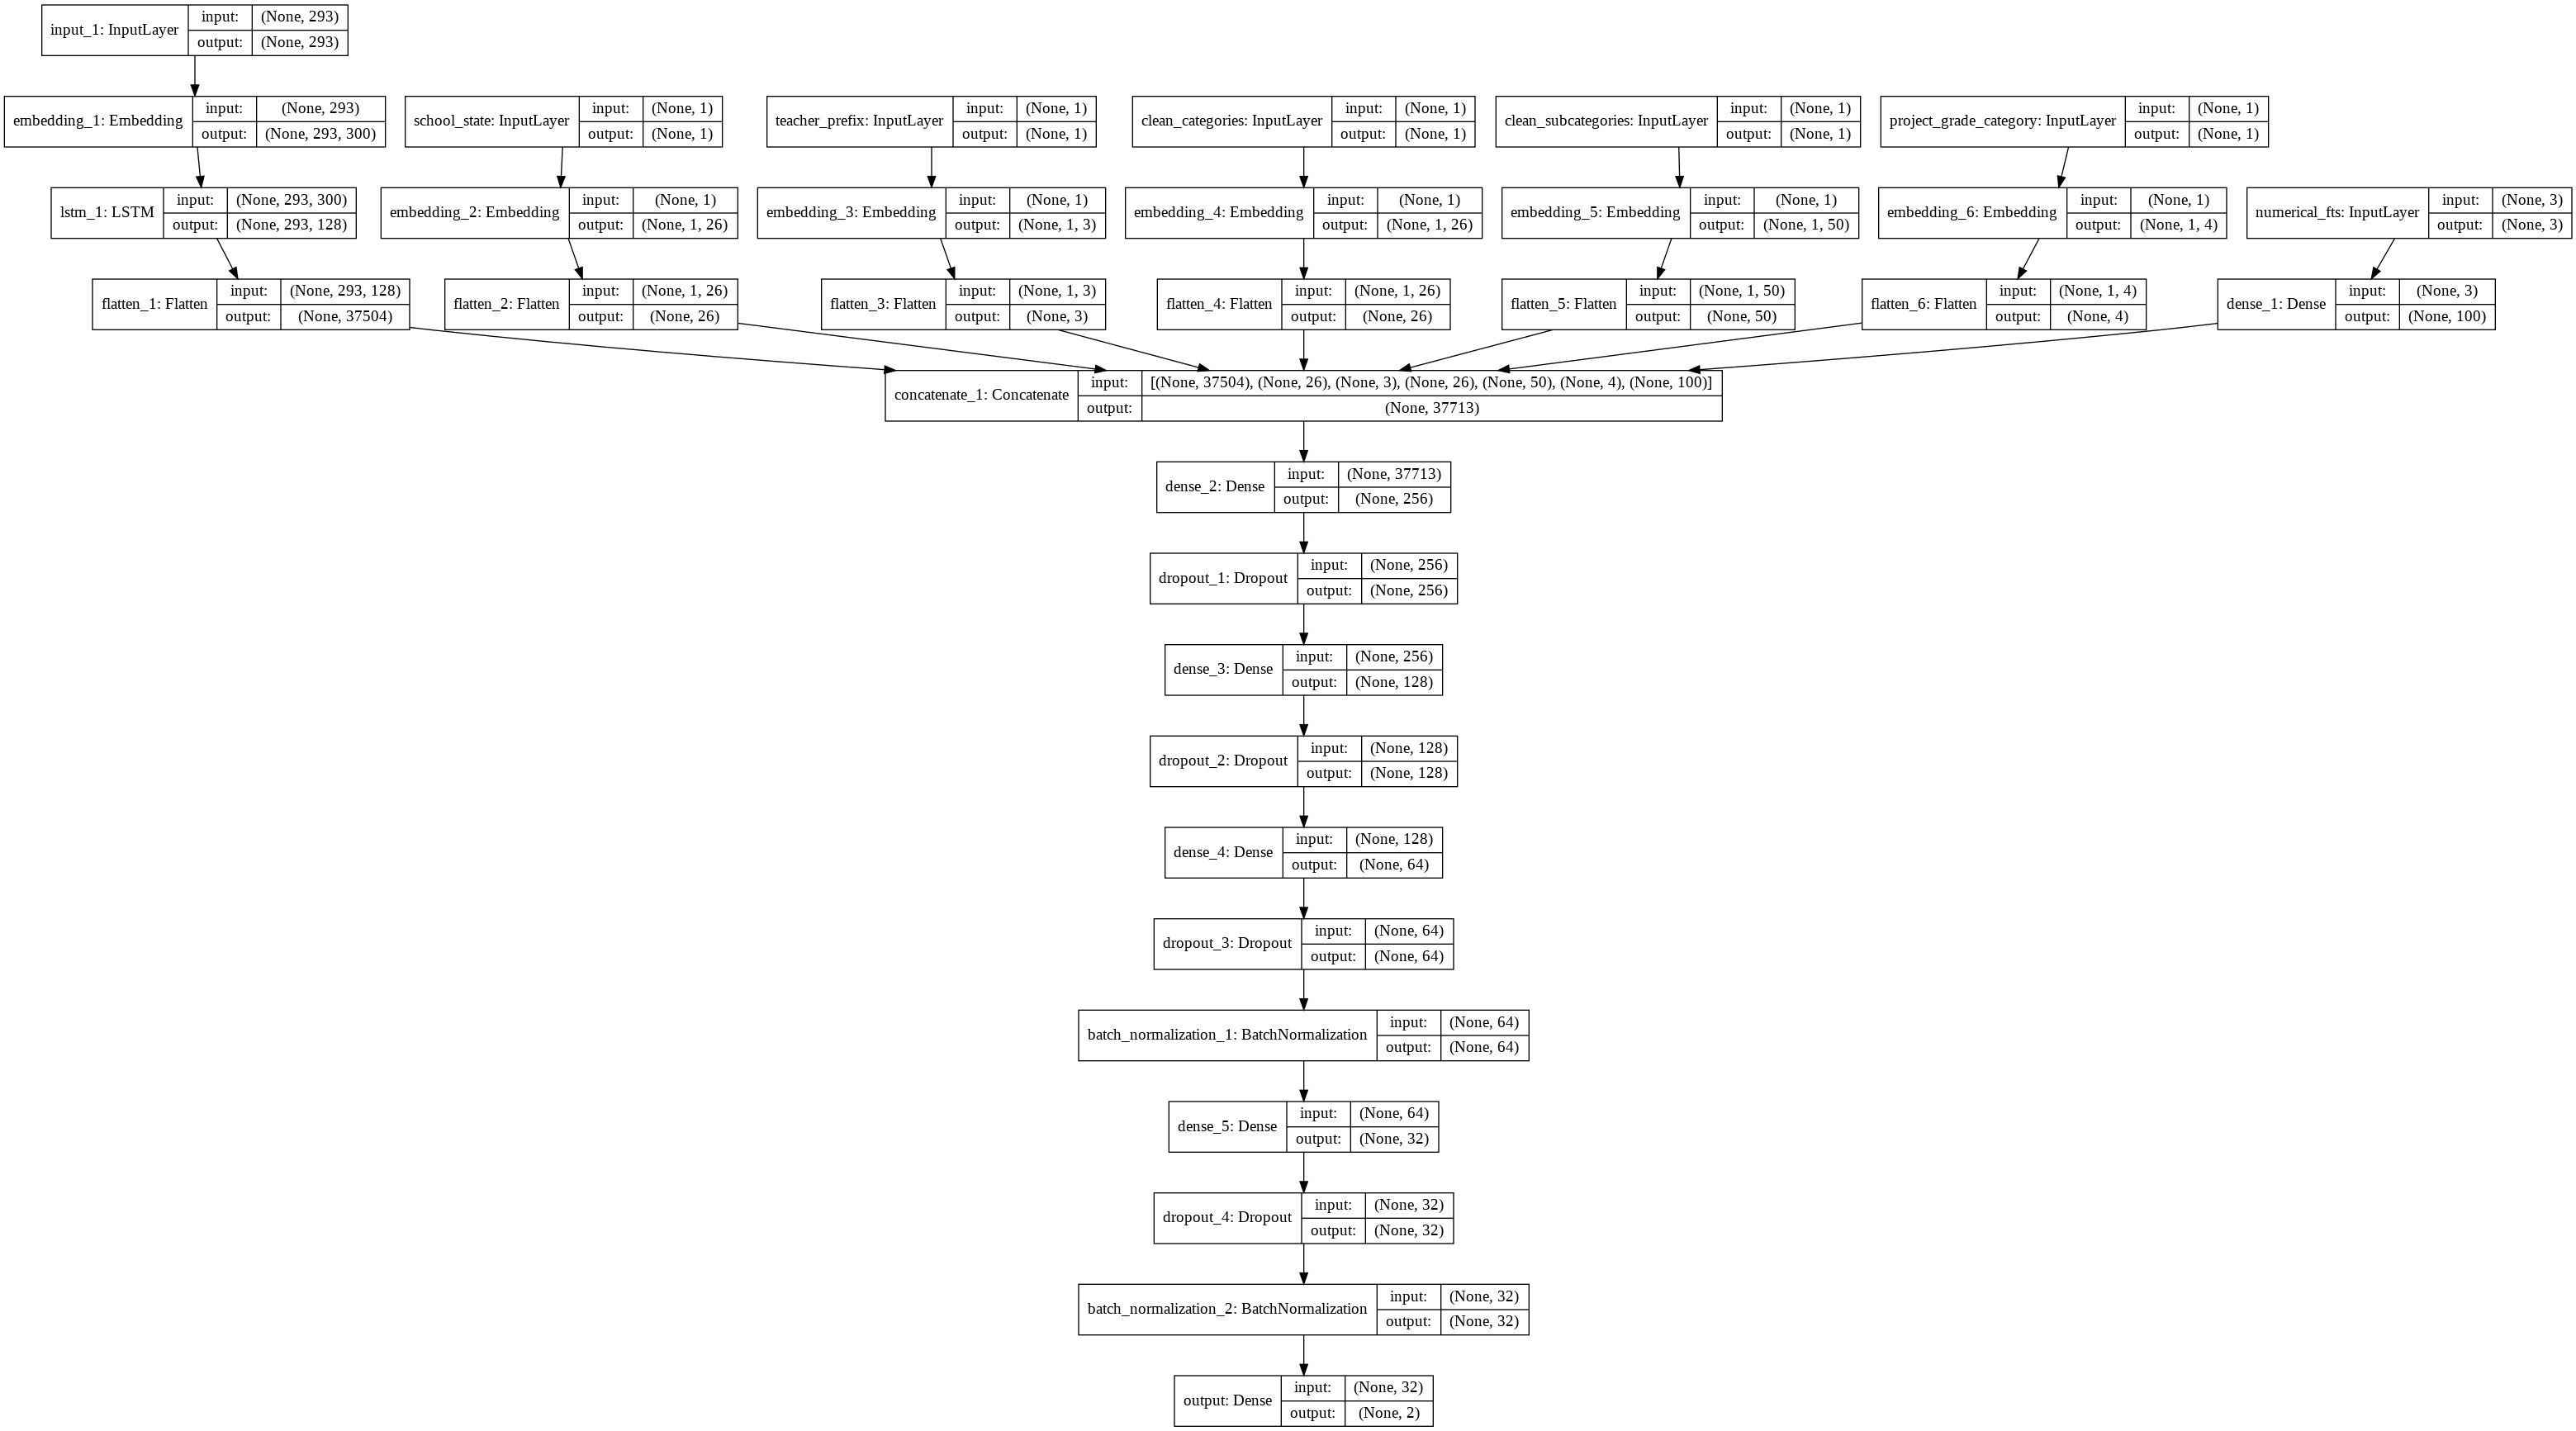

In [0]:
# code source - https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model_two, to_file='model_one.png', show_shapes=True, show_layer_names=True)

In [0]:
#https://www.tensorflow.org/tensorboard/scalars_and_keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
checkpoint_1 = ModelCheckpoint("model_one.h5",
                                monitor="val_auroc",
                                mode="max",
                                save_best_only = True,
                                verbose=1)
earlystop_1 = EarlyStopping(monitor = 'val_auroc',
                            mode="max",
                            min_delta = 0,
                            patience = 20,
                            verbose = 1)
tensorboard_1 = TensorBoard(log_dir='graph_two', batch_size=512,update_freq='epoch')
callbacks_1 = [checkpoint_1,earlystop_1,tensorboard_1]

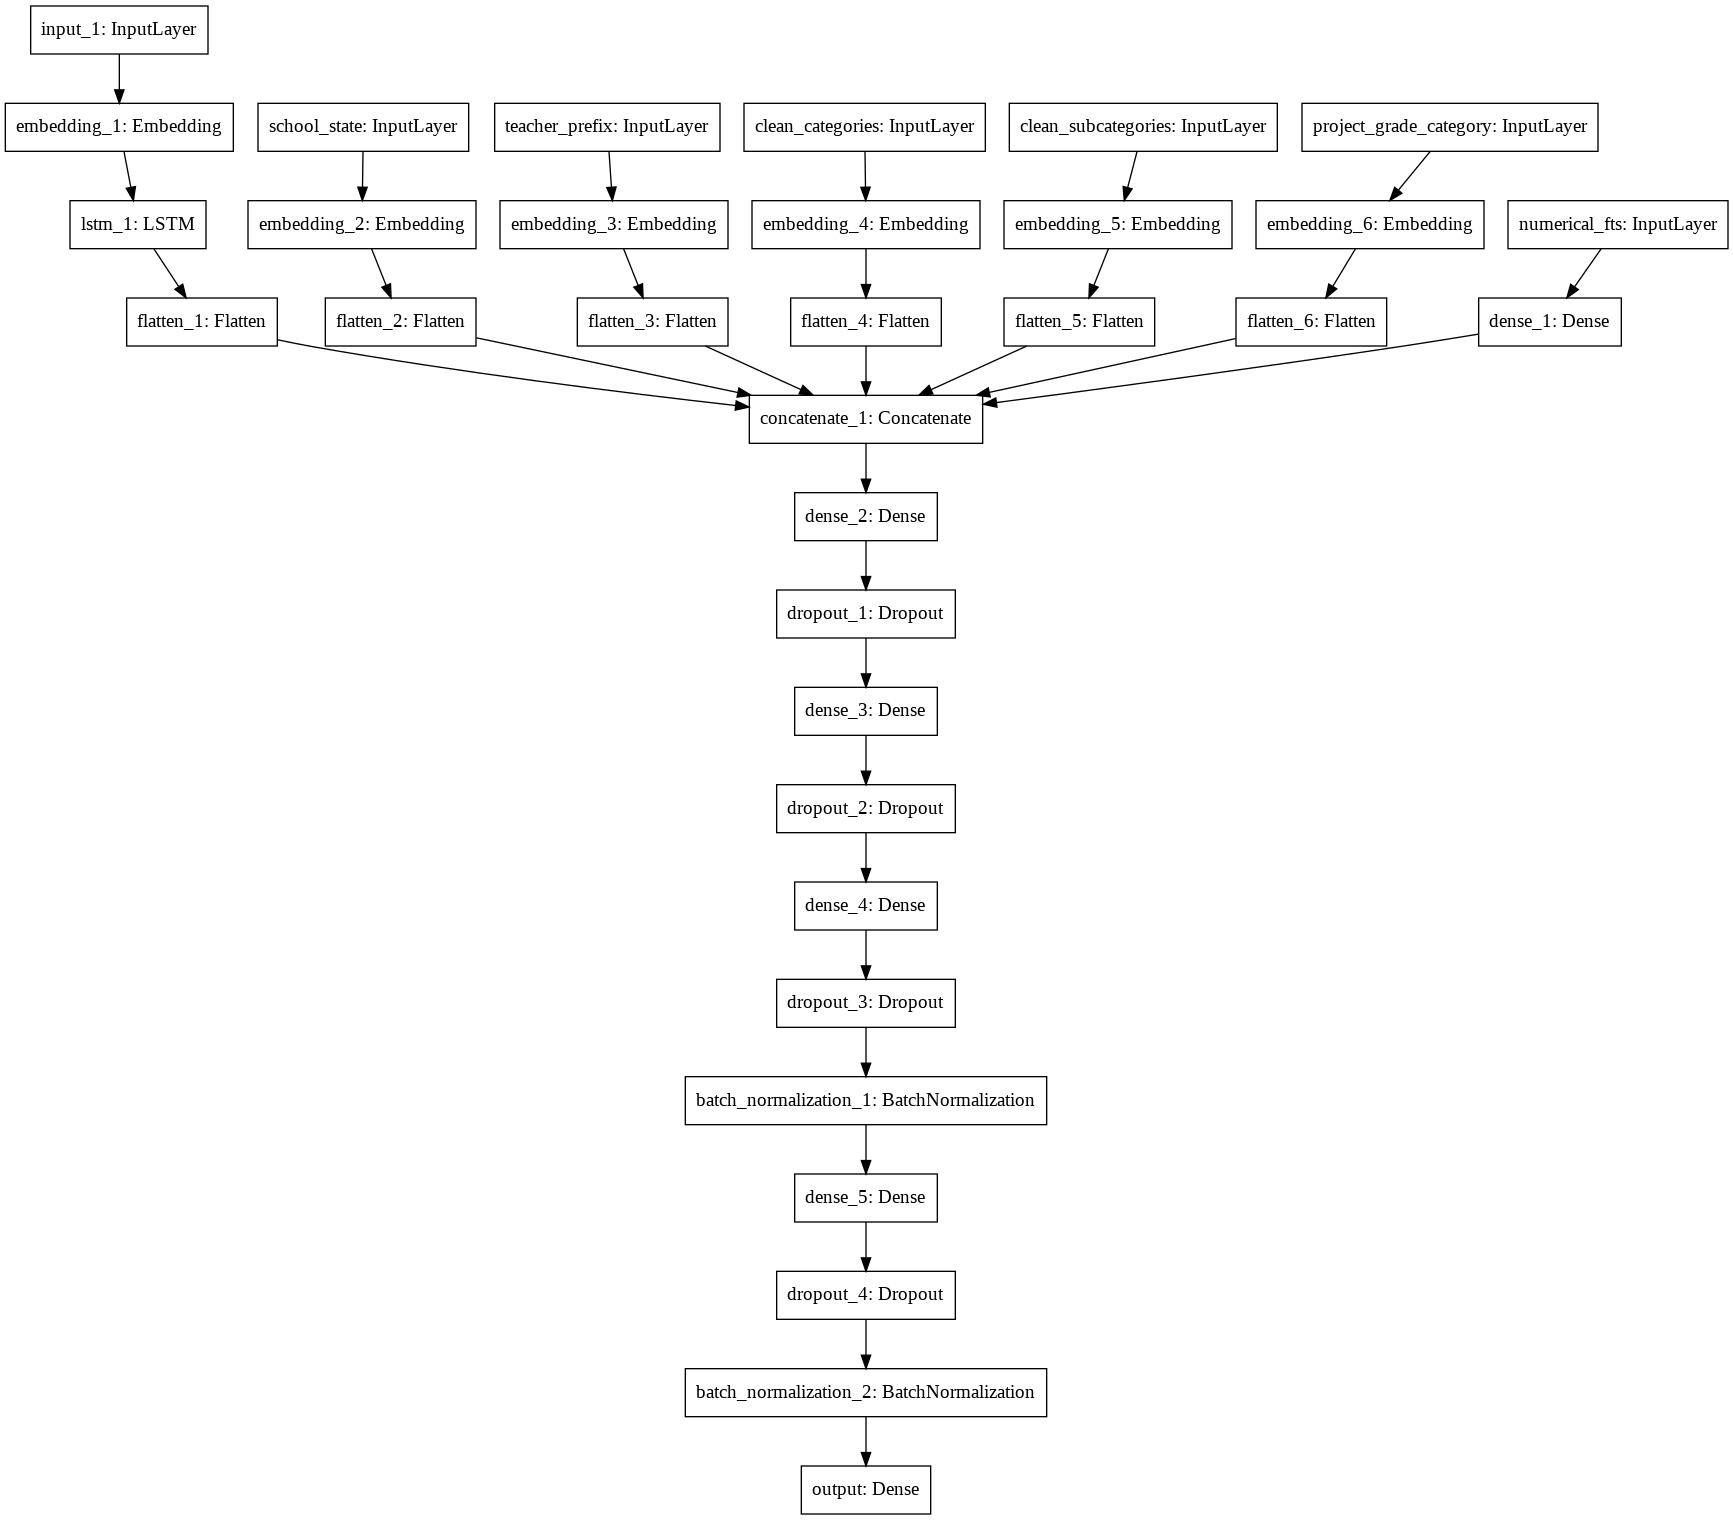

In [0]:
from keras.utils import plot_model
plot_model(model_two, to_file='model_two.png')

In [0]:
# code source - https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
train_one = [padded_essay_train, enc_school_state_train, enc_teacher_prefix_train, enc_cat_train, enc_subcat_train, enc_grade_train, numerical_fts_train]
test_one = [padded_essay_test, enc_school_state_test, enc_teacher_prefix_test, enc_cat_test, enc_subcat_test, enc_grade_test, numerical_fts_test]

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [0]:
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc]) 

In [0]:
h2 = model_two.fit(train_one, y_train, batch_size=512, epochs=15, validation_data=(test_one, y_test),verbose=1, callbacks=callbacks_1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 73196 samples, validate on 36052 samples


Epoch 1/15
73196/73196 [==============================] - 109s 1ms/step - loss: 3.1296 - auroc: 0.5050 - val_loss: 2.4193 - val_auroc: 0.5514

Epoch 00001: val_auroc improved from -inf to 0.55144, saving model to model_one.h5

Epoch 2/15
73196/73196 [==============================] - 106s 1ms/step - loss: 2.1521 - auroc: 0.5102 - val_loss: 1.8624 - val_auroc: 0.5679

Epoch 00002: val_auroc improved from 0.55144 to 0.56787, saving model to model_one.h5
Epoch 3/15
73196/73196 [==============================] - 106s 1ms/step - loss: 1.6974 - auroc: 0.5189 - val_loss: 1.5373 - val_auroc: 0.6409

Epoch 00003: val_auroc improved from 0.56787 to 0.64086, saving model to model_one.h5
Epoch 4/15
73196/73196 [==============================] - 107s 1ms/step - loss: 1.3671 - auroc: 0.6637 - val_loss: 1.2255 - val_auroc: 0.7336

Epoch 00004: val_auroc i

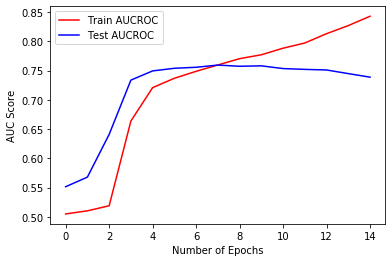

In [0]:
fig,a = plt.subplots(1,1)
a.set_xlabel('Number of Epochs') ;
a.set_ylabel('AUC Score')

plt.plot(h2.history['auroc'], 'r')
plt.plot(h2.history['val_auroc'], 'b')
plt.legend({'Train AUCROC': 'r', 'Test AUCROC':'b'})
plt.show()

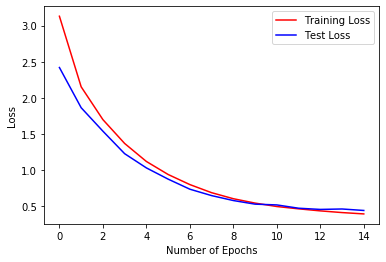

In [0]:
fig,a = plt.subplots(1,1)
a.set_xlabel('Number of Epochs') ;
a.set_ylabel('Loss')

plt.plot(h2.history['loss'], 'r')
plt.plot(h2.history['val_loss'], 'b')
plt.legend({'Training Loss': 'r', 'Test Loss':'b'})
plt.show()

#### The best score we got for Model 2 is 0.759 which has improved slightly more than Model 1.The corresponding loss is 0.64.